In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = df["Survived"]
df.drop(columns="PassengerId",inplace=True)

# Intenciones 

En este EDA mi intencio es explorar las caracteristicas de las personas que sobreviven y la de las que no sobreviven 

**Preguntas Interesantes**

1. Ser Mujer mejoraba tus posibilidades de Supervivencia?
2. Que rango etario es el que mas sobrevivia
3. Tener un Status elevado en la sociedad mejoraba tus posibilidades de supervivencia?
4. Gastar mas dinero en Tickets mejoraba tus chances de sobrevivir?
5. Pertenecer a primera clase aumenta tus posibilidades de sobrevivir?
6. Tener hijos hace que tus posibilidades de supervivencia mejoren?
7. Existia camaraderia entre personas que embarcaban en el mismo puerto que mejorara sus chances de sobrevivir?

# Indice 
1. [Missing Values](#handeling-missing-values)
2. [Duplicated Values](#handeling-duplicates)
3. [Analisis de Tipo de Datos](#analisis-de-tipo-de-datos)
4. [Data Distribucion](#exploring-data-distributions)
5. [Numerical](#numerical-data)
6. [Categorical](#categorical-data)
7. [survivor's composition](#exploring-composition)
8. [Sex](#sex-survivement)
9. [Passanger Class](#pclass-survivement)
10. [Siblings and Children](#sibsp-survivement)
11. [Embarkation](#embarked-survivement)
12. [Fare](#fare-survivement)
13. [Category](#age-category-survivement)
14. [Name Titles](#exploring-name-titles)
15. [Summary](#summary)
16. [Relationships](#exploring-data-relationships)
17. [Categorical Survivemt](#exploring-the-relationships-between-categorical-data-and-survivement)
18. [Chi2](#chi-cuadrado)
19. [Anova](#anova)

# Handeling Missing Values

In [5]:
(df.isna().sum()/len(df))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [6]:
df.drop(columns="Cabin",inplace=True)

In [7]:
df["Embarked"].ffill(inplace=True)

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
(df.isna().sum()/len(df))*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

# Handeling Duplicates

In [10]:
test = df.duplicated()
df[test]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Analisis de Tipo de Datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [12]:
df_numeric = df.select_dtypes(["int64","float64"])
df_objet = df.select_dtypes("object")
df_categorical = df.select_dtypes("object")

In [13]:
df_numeric.drop(columns="Survived", inplace=True)

In [14]:
df_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [15]:
#im moving Pclass, SibSp and Parch to a categorical df to have it separated
df_categorical["SibSp"] = df_numeric["SibSp"] 
df_categorical["Parch"] = df_numeric["Parch"] 
df_categorical["Pclass"] = df_numeric["Pclass"] 
df_categorical.drop(columns=["Name","Ticket"],inplace=True)

In [16]:
df_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [17]:
df_objet.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [18]:
df_categorical.head()

,Sex,Embarked,SibSp,Parch,Pclass
0,male,S,1,0,3
1,female,C,1,0,1
2,female,S,0,0,3
3,female,S,1,0,1
4,male,S,0,0,3


# Exploring Data Distributions

## Numerical Data

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns 

In [20]:
df_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


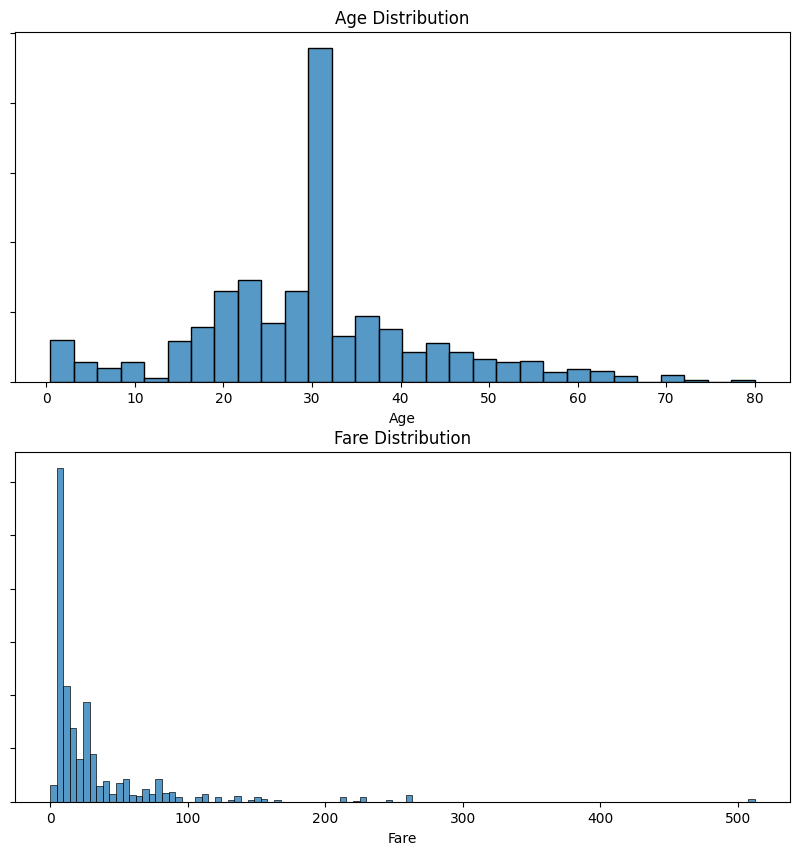

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.histplot(data=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

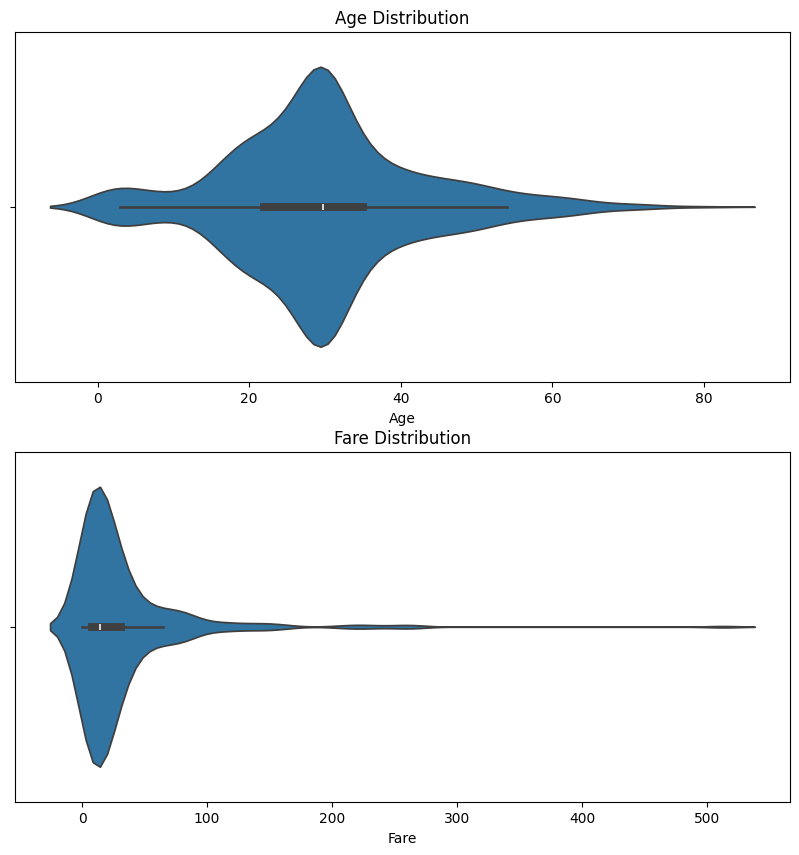

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.violinplot(x=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.violinplot(x=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

## Categorical Data

In [23]:
df_categorical.head()

,Sex,Embarked,SibSp,Parch,Pclass
0,male,S,1,0,3
1,female,C,1,0,1
2,female,S,0,0,3
3,female,S,1,0,1
4,male,S,0,0,3


<Axes: xlabel='Embarked'>

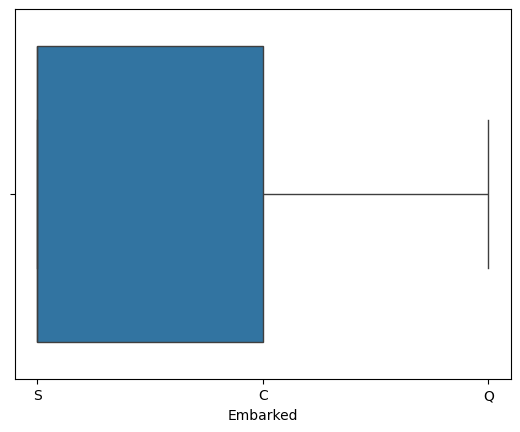

In [24]:
sns.boxplot(x=df_categorical["Embarked"]) #creates graph

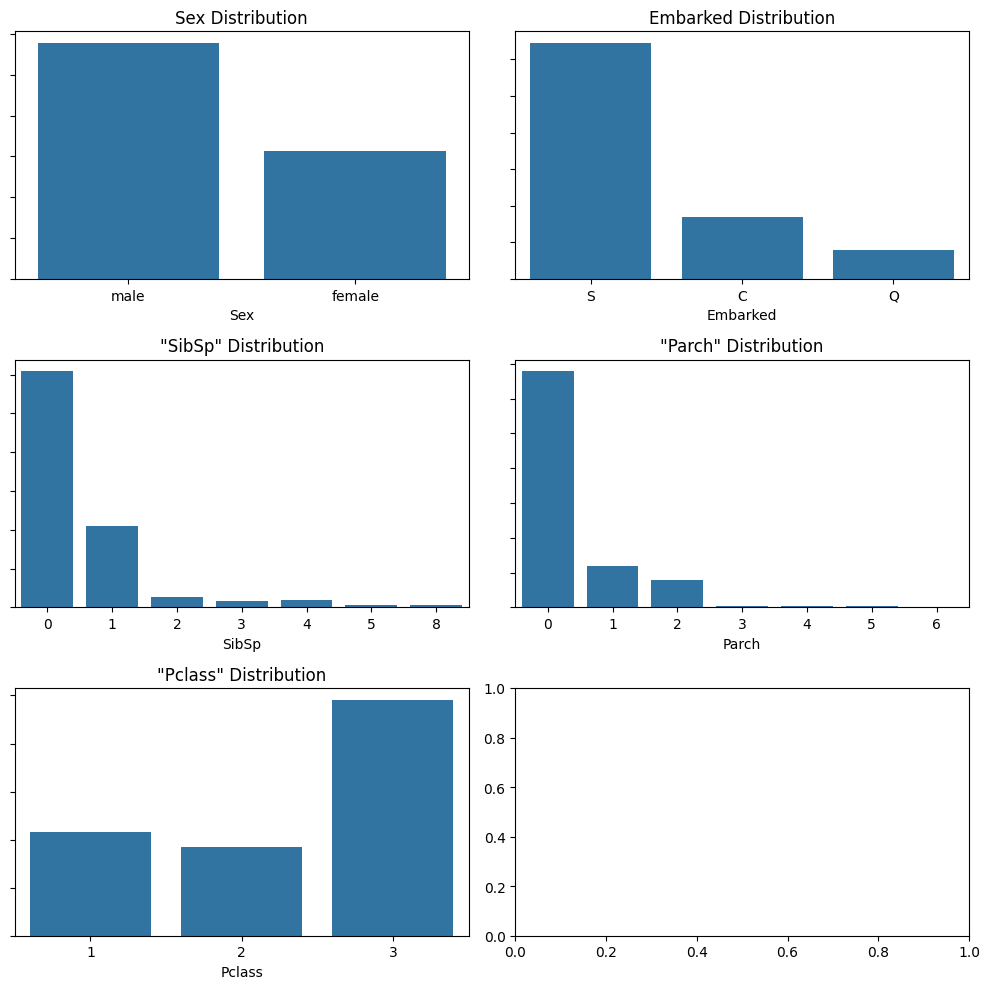

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

g1 = sns.countplot(x=df_categorical["Sex"],ax=ax[0,0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Sex Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.countplot(x=df_categorical["Embarked"],ax=ax[0,1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Embarked Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot(x=df_categorical["SibSp"],ax=ax[1,0]) #creates graph

g3.set(yticklabels=[])  # remove the tick labels
g3.set(title='"SibSp" Distribution')  # add a title
g3.set(ylabel=None)  # remove the axis label


g4 = sns.countplot(x=df_categorical["Parch"],ax=ax[1,1]) #creates graph

g4.set(yticklabels=[])  # remove the tick labels
g4.set(title='"Parch" Distribution')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot(x=df_categorical["Pclass"],ax=ax[2,0]) #creates graph

g5.set(yticklabels=[])  # remove the tick labels
g5.set(title='"Pclass" Distribution')  # add a title
g5.set(ylabel=None)  # remove the axis label

fig.tight_layout()
plt.show()

# Exploring Composition

## Sex Survivement

<Axes: xlabel='Sex', ylabel='Survived'>

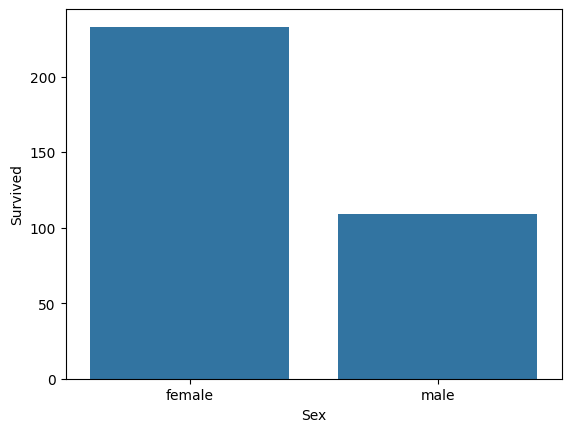

In [27]:
#Sex and Survivement
Sex_Survived = df[["Sex","Survived"]].groupby(["Sex"]).sum()
sns.barplot(data=Sex_Survived, x="Sex", y="Survived")

## Pclass Survivement

<Axes: xlabel='Pclass', ylabel='Survived'>

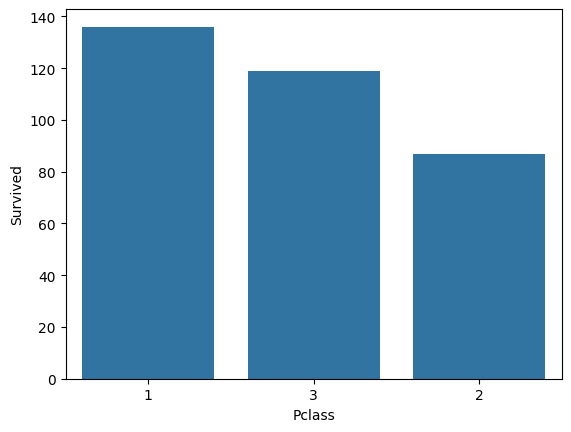

In [28]:
#Pclass and Survivement
Pclass_Survived = df[["Pclass","Survived"]].groupby(["Pclass"]).sum()

sns.barplot(data=Pclass_Survived, x="Pclass", y="Survived", order=["1","3","2"])

## SibSp Survivement

<Axes: xlabel='SibSp', ylabel='Survived'>

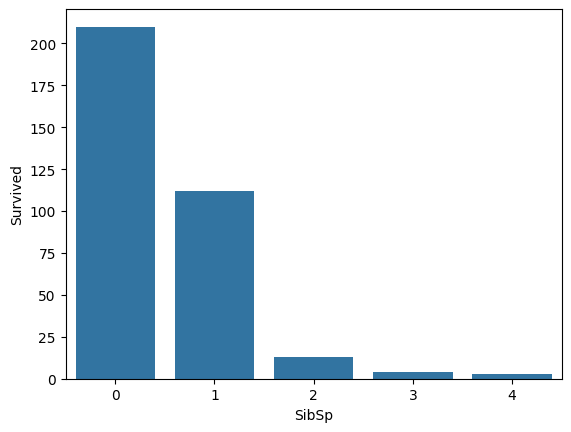

In [29]:
#SibSp and Survivement
SibSp_Survived = df[["SibSp","Survived"]].groupby(["SibSp"]).sum()
SibSp_Survived.reset_index()
sns.barplot(data=SibSp_Survived, x="SibSp", y="Survived", order=["0","1","2","3","4"])

## Embarked Survivement

<Axes: xlabel='Embarked', ylabel='Survived'>

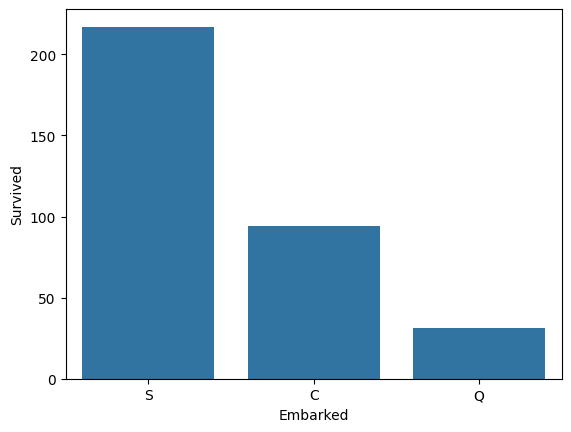

In [30]:
#Embarked and Survivement
Embarked_Survived = df[["Embarked","Survived"]].groupby(["Embarked"]).sum()
Embarked_Survived.reset_index()
sns.barplot(data=Embarked_Survived, x="Embarked",y="Survived", order=["S","C","Q"])

## Fare Survivement

In [31]:
bins = [-np.inf,8,15,31,np.inf]
labels = ["bajo","medio","medio-alto","alto"]

df["Fare Category"] = pd.cut(df["Fare"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,bajo
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,alto
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,bajo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,alto
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,medio


In [32]:
#Fare and Survivement
Fare_Survivement = df[["Fare Category","Survived"]].groupby(["Fare Category"], observed=False).sum()
Fare_Survivement

,Survived
Fare Category,
bajo,52
medio,62
medio-alto,99
alto,129


<Axes: xlabel='Fare Category', ylabel='Survived'>

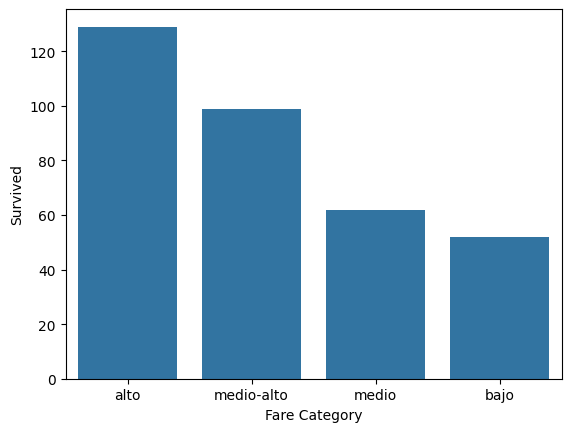

In [33]:
sns.barplot(Fare_Survivement, x = "Fare Category", y="Survived" , order=["alto","medio-alto","medio","bajo"])

## Age Category Survivement

In [34]:
bins = [-np.inf,1,3,5,12,18,25,64,np.inf]
labels = ["baby","Toddler","Preschool","GrandSchooler","Teen","Young Adult","Adult","Senior"]

df["Age Category"] = pd.cut(df["Age"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Category,Age Category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,bajo,Young Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,alto,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,bajo,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,alto,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,medio,Adult


In [35]:
#Age and Survivement
Age_category_Survived = df[["Age Category","Survived"]].groupby(["Age Category"], observed=False).sum()
Age_category_Survived = Age_category_Survived.sort_values(by="Survived",ascending=False).reset_index()
Age_category_Survived.reset_index(drop=True)
Age_category_Survived.head(10)

,Age Category,Survived
0,Adult,217
1,Young Adult,54
2,Teen,30
3,baby,12
4,Preschool,11
5,GrandSchooler,9
6,Toddler,8
7,Senior,1


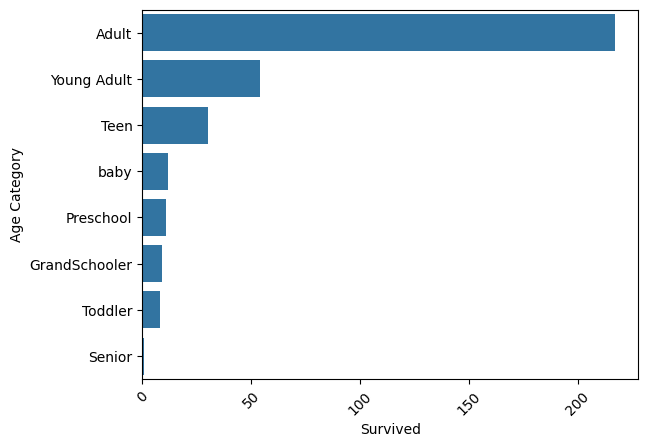

In [36]:
sns.barplot(data=Age_category_Survived, y="Age Category",x="Survived",order=["Adult","Young Adult","Teen","baby","Preschool","GrandSchooler","Toddler","Senior"])
plt.xticks(rotation=45)
plt.show()

## Exploring name titles 

In [37]:
import re

In [38]:
# Regular expression pattern to match common name titles
pattern = r"Mr\.|Master\.|Mrs\.|Miss\.\s+"

df.loc[~df["Name"].str.contains(pattern, regex=True),"Title Name"] = 1
df["Title Name"].fillna(0, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Category,Age Category,Title Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,bajo,Young Adult,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,alto,Adult,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,bajo,Adult,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,alto,Adult,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,medio,Adult,0.0


In [39]:
df.loc[:,["Title Name","Survived"]].groupby("Title Name").mean()*100

,Survived
Title Name,
0.0,38.194444
1.0,44.444444


<Axes: xlabel='Title Name', ylabel='Survived'>

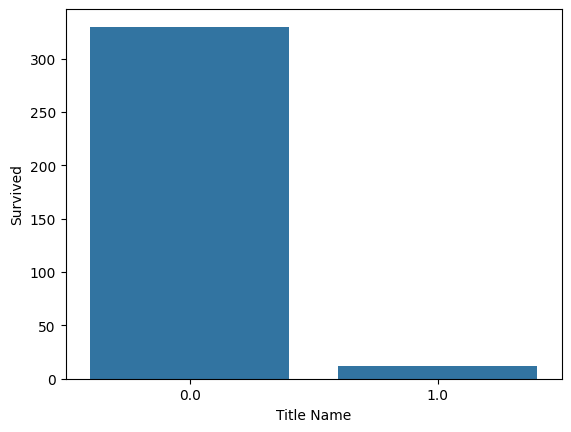

In [40]:
TitleName_Survive = df[["Title Name","Survived"]].groupby(["Title Name"]).sum()
sns.barplot(data=TitleName_Survive,x="Title Name",y="Survived")

## Summary

En terminos de sobrevivencia podemos observar que :
1. En relacion con el **Sexo** Sobrevivieron mas **Mujeres** que hombres
2. En relacion con la **Clase** del pasaje sobrevivieron mas pasajeros de **1ra** clase que de 3ra y 2da (3ra sobrevivio mas gente que 2ra)
3. En relacion con **SibSp** (hijos o hermanos) con la sobreviviencia se observa que sobrevivieron en el siguiente orden de cantidad 01234
4. En leracion con **Embarked** sobrevivieron en el siguiente orden S C Q
5. En relacion con preico del ticket **Fare** la composicion de supervivencia es alto medioalto meido bajo (mas gasta mas sobrevive)
6. En realcion con la edad **Age** la sobrevivencia la indica la siguiente lista (de mayor sobrevivencia a menor sobrevivencia) Adult, Young Adult, Teen, baby, Preschool, GrandSchooler,Toddler, Senior 
7. En relacion con los titulos de nombre **Title Name** se observa que hay mas gente sin titulos de nombre se sobrevivio pero cuando vemos los porcentajes de sobrevivencia vemos exactamente lo opuesto con lo que podemos pensar que quizas es mas probable sobrevivir si tiene un titulo de nombre a que si no lo tengo

**Nota**: el resumen se basa en terminos totales, pero es de destacar que cuando hablamos en terminos porcentuales algunos resultados cambian favoreciendo poblacion que suponen una minoria con lo que es interesante considerarlo ya que esto podria indicar que de pertenecer a esa categoria haria que las probabilidades de supervivencia aumenten.


# Exploring Data Relationships

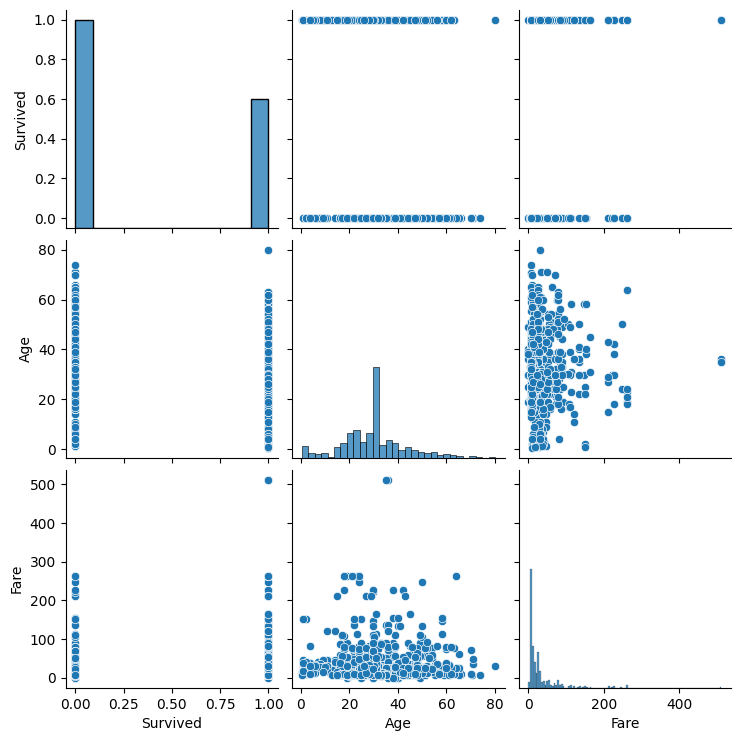

In [41]:
numerical = df.select_dtypes("number")
numerical.drop(columns=["Pclass","SibSp","Parch","Title Name"],inplace=True)
sns.pairplot(data=numerical)

## Exploring the Relationships between categorical data and Survivement

<Axes: xlabel='Survived', ylabel='Pclass'>

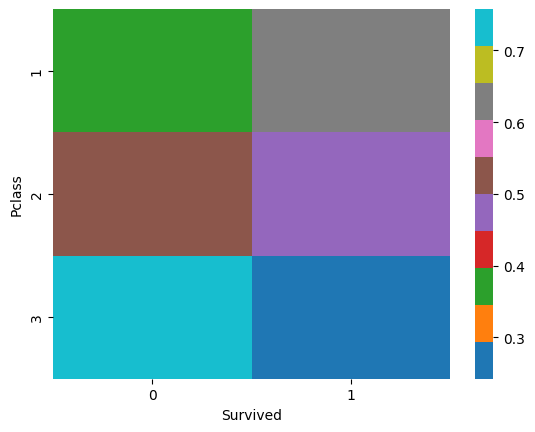

In [42]:
# Survivement y Pclass
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

### Chi Cuadrado

In [43]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Pclass'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")

Chi-cuadrado: 102.88898875696056
Valor p: 4.549251711298793e-23
Grados de libertad: 2
Frecuencia esperada:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [44]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Pclass'] == 1]  # Pasajeros de clase 1
grupo2 = df['Survived'][df['Pclass'] == 2]  # Pasajeros de clase 2
grupo3 = df['Survived'][df['Pclass'] == 3]  # Pasajeros de clase 3

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 57.964817590910116
Valor p: 2.1832474151179777e-24
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


<Axes: xlabel='Survived', ylabel='Sex'>

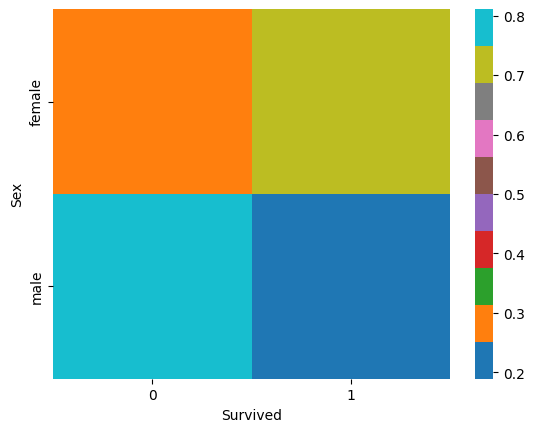

In [45]:
#Survivement y Sex
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Sex'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

### Chi Cuadrado

In [46]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Sex'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 260.71702016732104
Valor p: 1.1973570627755645e-58
Grados de libertad: 1
Frecuencia esperada:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


<Axes: xlabel='Survived', ylabel='SibSp'>

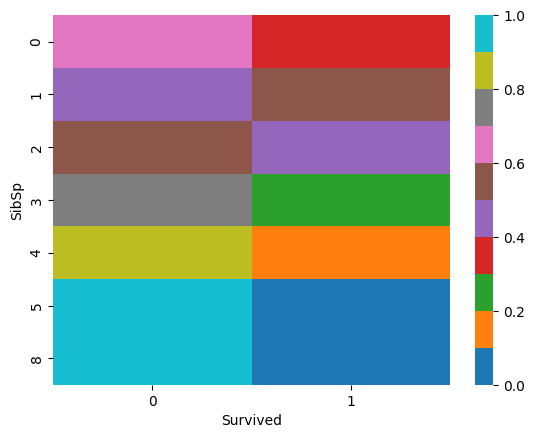

In [47]:
#Survivement y SibSp
# Heatmap
sns.heatmap(pd.crosstab(df['SibSp'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

### Chi Cuadrado

In [48]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['SibSp'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 37.2717929152043
Valor p: 1.5585810465902147e-06
Grados de libertad: 6
Frecuencia esperada:
 [[374.62626263 233.37373737]
 [128.77777778  80.22222222]
 [ 17.25252525  10.74747475]
 [  9.85858586   6.14141414]
 [ 11.09090909   6.90909091]
 [  3.08080808   1.91919192]
 [  4.31313131   2.68686869]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [49]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['SibSp'] == 1]  
grupo2 = df['Survived'][df['SibSp'] == 2]  
grupo3 = df['Survived'][df['SibSp'] == 0]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 12.382922977499323
Valor p: 5.008837163779135e-06
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


<Axes: xlabel='Survived', ylabel='Parch'>

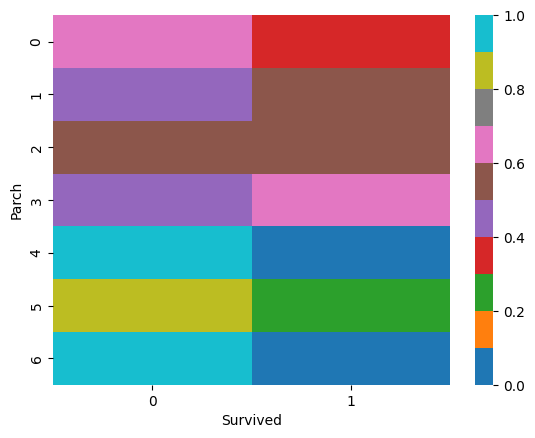

In [50]:
#Survivement y Parch
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Parch'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [51]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Parch'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 27.925784060236168
Valor p: 9.703526421039996e-05
Grados de libertad: 6
Frecuencia esperada:
 [[4.17757576e+02 2.60242424e+02]
 [7.27070707e+01 4.52929293e+01]
 [4.92929293e+01 3.07070707e+01]
 [3.08080808e+00 1.91919192e+00]
 [2.46464646e+00 1.53535354e+00]
 [3.08080808e+00 1.91919192e+00]
 [6.16161616e-01 3.83838384e-01]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [52]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Parch'] == 1]  
grupo2 = df['Survived'][df['Parch'] == 2]  
grupo3 = df['Survived'][df['Parch'] == 3]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 0.2916101082888942
Valor p: 0.7473768392839593
No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.


<Axes: xlabel='Survived', ylabel='Embarked'>

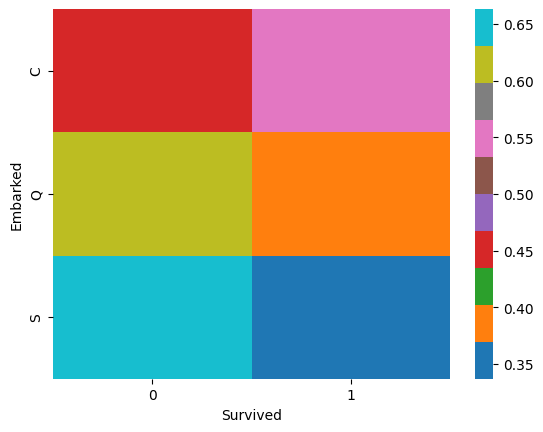

In [53]:
# Survivement y Embarked
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Embarked'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [54]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Embarked'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 27.277791555577956
Valor p: 1.193171371319345e-06
Grados de libertad: 2
Frecuencia esperada:
 [[104.13131313  64.86868687]
 [ 48.06060606  29.93939394]
 [396.80808081 247.19191919]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [55]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Embarked'] == "S"]  
grupo2 = df['Survived'][df['Embarked'] == "Q"]  
grupo3 = df['Survived'][df['Embarked'] == "C"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 14.022262403660234
Valor p: 1.0101685136937038e-06
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


<Axes: xlabel='Survived', ylabel='Fare Category'>

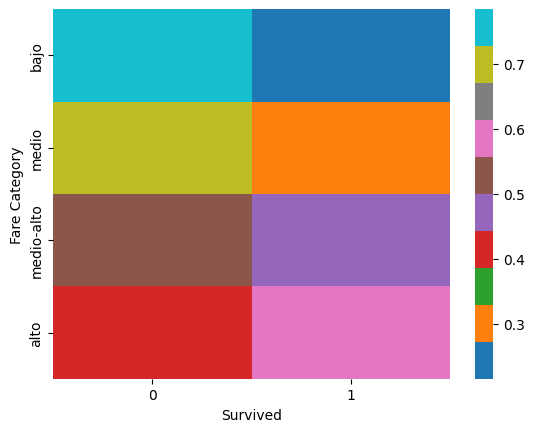

In [56]:
# Survivement y Fare Category
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Fare Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [57]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Fare Category'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 80.63699551282524
Valor p: 2.2407589940901074e-17
Grados de libertad: 3
Frecuencia esperada:
 [[148.49494949  92.50505051]
 [133.70707071  83.29292929]
 [130.01010101  80.98989899]
 [136.78787879  85.21212121]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [58]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Fare Category'] == "alto"]  
grupo2 = df['Survived'][df['Fare Category'] == "medio-alto"]  
grupo3 = df['Survived'][df['Fare Category'] == "medio"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 20.882610704152636
Valor p: 1.6274155595629213e-09
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


<Axes: xlabel='Survived', ylabel='Age Category'>

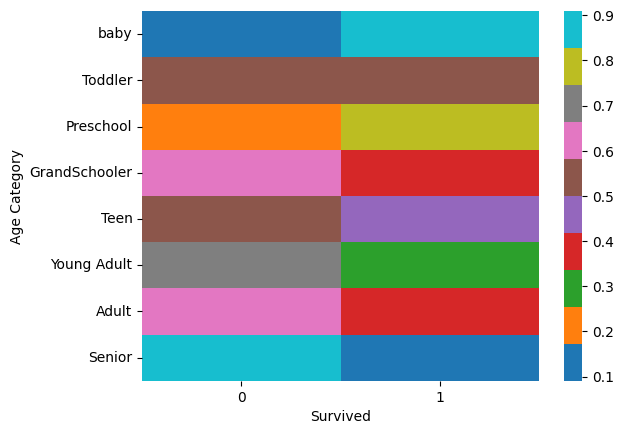

In [59]:
# Survivement y Age Category
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Age Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [60]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Age Category'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 30.32495398225454
Valor p: 8.27716066019009e-05
Grados de libertad: 7
Frecuencia esperada:
 [[  8.62626263   5.37373737]
 [  9.85858586   6.14141414]
 [  8.62626263   5.37373737]
 [ 15.4040404    9.5959596 ]
 [ 43.13131313  26.86868687]
 [ 99.81818182  62.18181818]
 [356.75757576 222.24242424]
 [  6.77777778   4.22222222]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [61]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Age Category'] == "baby"]  
grupo2 = df['Survived'][df['Age Category'] == "toddler"]  
grupo3 = df['Survived'][df['Age Category'] == "preschool"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: nan
Valor p: nan
No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<Axes: xlabel='Survived', ylabel='Title Name'>

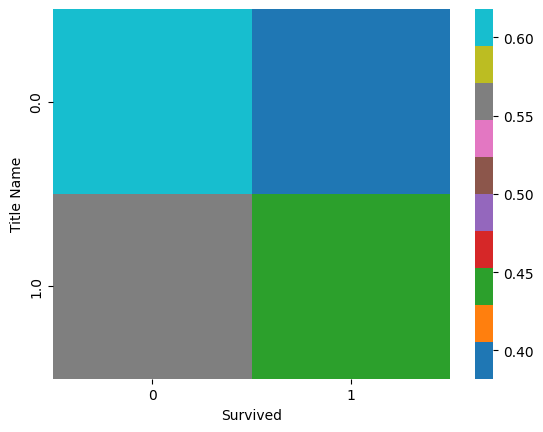

In [62]:
# Survivement y Title Name
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Title Name'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [63]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Title Name'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 0.20854117234685074
Valor p: 0.6479132287275894
Grados de libertad: 1
Frecuencia esperada:
 [[532.36363636 331.63636364]
 [ 16.63636364  10.36363636]]
No se rechaza la hipótesis nula: no hay asociación entre las variables.


## Interaction Analysis 

# Data bias analysis

# Exploracion multivariante

In [ ]:
from sklearn import ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, train_test_split


